In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [13]:
import networkx as nx
from eppy.bunch_subclass import EpBunch

from case_edits.ezcase import *
from helpers.ep_helpers import *
from helpers.ep_geom_helpers import *
from helpers.geometry_interfaces import *
from helpers.helpers import *
from plan.helpers import get_plans_from_file
from network.network2 import *
from network.visuals import *
from subsurfaces.logic import get_connecting_surface


In [4]:

inputs_dir = "case_red_d3"
outputs_dir = "tests/test22_svg2plan"

case = initialize_case(outputs_dir)
path_to_input = get_path_to_inputs(inputs_dir)
pairs = get_subsurface_pairs_from_case(path_to_input)




In [5]:
case = create_ezcase(outputs_dir, inputs_dir)
idf = case.idf

out.idf exists
IDF has changed: True


In [10]:
G, positions = create_graph_for_zone(idf, path_to_input)
G, positions  = add_cardinal_directions(G, positions)
G = add_edges(idf, G, pairs)

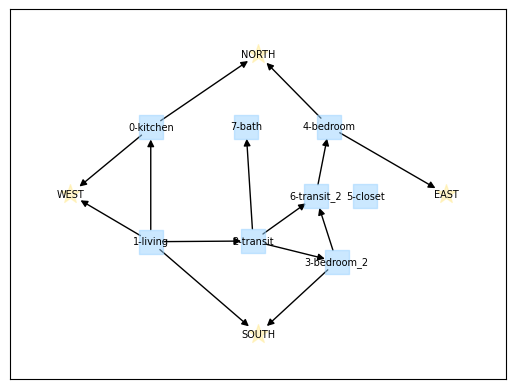

In [14]:
zone_nodes, cardinal_nodes = filter_nodes(G)
draw_graph_with_node_labels(G, positions, zone_nodes)
draw_graph_with_node_labels(G, positions, cardinal_nodes, color=CARDINAL_COLOR, shape="*", size=200)
draw_graph_edges(G, positions)

In [26]:
G.nodes

NodeView(('0-kitchen', '1-living', '2-transit', '3-bedroom_2', '4-bedroom', '5-closet', '6-transit_2', '7-bath', 'NORTH', 'EAST', 'SOUTH', 'WEST'))

In [37]:
get_node_in_G(G, pairs[0].space_a)

'1-living'

In [39]:
# edgee between node labels
# data => type of ss. surface its on. direction of surface its on. later, in afn or not. 
for pair in pairs:
    surf = get_connecting_surface(idf, pair)
    assert surf
    subsurface = surf.subsurfaces[0] #just one each

    node_a = get_node_in_G(G, pair.space_a)
    node_b = get_node_in_G(G, pair.space_b)
    print(node_a, node_b)
    G.add_edge(node_a, node_b, surface=surf.Name, subsurfaces=subsurface.Name, stype=pair.attrs.object_type.name)




1-living 2-transit
1-living 0-kitchen
2-transit 6-transit_2
2-transit 3-bedroom_2
2-transit 7-bath
6-transit_2 4-bedroom
3-bedroom_2 6-transit_2
4-bedroom EAST
4-bedroom NORTH
0-kitchen WEST
1-living WEST
0-kitchen NORTH
1-living SOUTH
3-bedroom_2 SOUTH


In [40]:
G.edges

OutEdgeView([('0-kitchen', 'WEST'), ('0-kitchen', 'NORTH'), ('1-living', '2-transit'), ('1-living', '0-kitchen'), ('1-living', 'WEST'), ('1-living', 'SOUTH'), ('2-transit', '6-transit_2'), ('2-transit', '3-bedroom_2'), ('2-transit', '7-bath'), ('3-bedroom_2', '6-transit_2'), ('3-bedroom_2', 'SOUTH'), ('4-bedroom', 'EAST'), ('4-bedroom', 'NORTH'), ('6-transit_2', '4-bedroom')])

In [29]:
get_node_in_G(G, pairs[-1].space_b)

'SOUTH'

In [18]:
surf.subsurfaces

[
 WINDOW,
     Block 03 Storey 0 Wall 0004 Window,    !- Name
     Project External Window,    !- Construction Name
     Block 03 Storey 0 Wall 0004,    !- Building Surface Name
     ,                         !- Frame and Divider Name
     1.0,                      !- Multiplier
     0.26,                     !- Starting X Coordinate
     1.4994999999999998,       !- Starting Z Coordinate
     0.71,                     !- Length
     1.52;                     !- Height]

In [ ]:
def get_subsurface_by_zone_and_surf(idf, zone_num, surf):
    zone_name = get_zone_name(zone_num)
    subsurfaces = idf.getsubsurfaces()
    find_zone_subsurfaces(zone_name, subsurfaces)


In [19]:
# collapse all to range.. 
def create_total_range(res: list[Domain]):
    mins = [i.width.min for i in res]
    maxes = [i.width.max for i in res]
    return Range(min(mins), max(maxes))


In [20]:
ranges = {k: create_total_range(v) for k,v in domains.items()}
ranges

{'EAST': (1.78, 3.15),
 'NORTH': (0.00, 1.70),
 'SOUTH': (0.00, 1.70),
 'WEST': (1.78, 3.15)}

In [32]:
assert ranges["EAST"] == ranges["WEST"]
assert ranges["NORTH"] == ranges["SOUTH"]
# assert ranges["NORTH"].__repr__() == ranges["SOUTH"].__repr__()

In [33]:
zone_domain = Domain(ranges["EAST"], ranges["NORTH"])
zone_domain

Domain(width=[1.78, 3.15], height=[0.00, 1.70])